# Sampling Method/Size

#### Goal of this notebook is to find the ideal Sample Size and Method that would be representative of the population for the Boston Housing Dataset.

In [1]:
install.packages("mlbench")
library(mlbench)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [1]:
data("BostonHousing")
dim(BostonHousing)
# c("Per capita crime rate by town", "Proportion of residential land zoned for lots over 25,000 sq.ft.", 
# "Proportion of non-retail business acres per town", "Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)",
# "Nitrogen oxides concentration (parts per 10 million)", "Average number of rooms per dwelling", 
# "Proportion of owner-occupied units built prior to 1940", "Weighted mean of distances to five Boston employment centres",
# "Index of accessibility to radial highways", "Full-value property-tax rate per \$10,000", "Pupil-teacher ratio by town",
# "1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town", "Lower status of the population (percent)")

Warning message in data("BostonHousing"):
“data set ‘BostonHousing’ not found”

ERROR: Error in eval(expr, envir, enclos): object 'BostonHousing' not found


### Check the Data Type of all columns

The dataset contains numeric columns, except for "chas" which is a categorical column. 

In [3]:
str(BostonHousing)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : num  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ b      : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


### Check for missing data and handle it.

We do not have any missing data

In [4]:
BostonHousing[!complete.cases(BostonHousing),]

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv


### Prepare data for Sampling

Let's separate features from the target. 

Note that we can include the categorical column chas in the aggregation as chas is a binary values column with 0 or 1 as values. We just need to convert the column's data type from factor to integer, we can perform computations on it like a numeric column.

In [5]:
bostonhousing_features <- BostonHousing[1:13]
bostonhousing_features$chas = as.numeric(as.character(bostonhousing_features$chas))
head(bostonhousing_features, 5)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


### Sample Method: Simple Random Sampling by drawing repeated samples without Replacement

Let's start with small sample size (say, n = 5) and draw repeated samples (say, r = 10). 


### Test 1: Sample Size n = 5 and Repeat  r = 10

In [6]:
n = 5
r = 10

#### Let's find the mean for the population

In [7]:
summary_vals = data.frame(feature=colnames(bostonhousing_features))
summary_vals['mean_'] = sapply(bostonhousing_features, mean)
summary_vals

feature,mean_
crim,3.61352356
zn,11.36363636
indus,11.13677866
chas,0.06916996
nox,0.55469506
rm,6.28463439
age,68.57490119
dis,3.79504269
rad,9.54940711
tax,408.23715415


#### Let's draw 10 sets of samples of 5 observations each and find the mean for each sample set.

In [8]:
library(dplyr, warn.conflicts = FALSE)
samples = list()
for (i in 1:r) {
    samples[[i]] = sample_n(bostonhousing_features, size = n, replace = FALSE)
}

In [9]:
for (i in 1:r) {
    summary_vals[paste('mean_', i)] = sapply(samples[[i]], mean)
}

In [10]:
summary_vals

feature,mean_,mean_ 1,mean_ 2,mean_ 3,mean_ 4,mean_ 5,mean_ 6,mean_ 7,mean_ 8,mean_ 9,mean_ 10
crim,3.61352356,6.441146,0.440626,0.68808,1.232118,17.47182,1.027114,15.3015,6.848664,14.86408,1.16103
zn,11.36363636,8.100000,10.000000,34.00000,20.000000,33.60000,18.500000,4.2000,7.500000,26.80000,4.40000
indus,11.13677866,13.442000,13.610000,7.49600,6.752000,11.23000,7.826000,16.1920,13.342000,7.21400,9.47800
chas,0.06916996,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0000,0.000000,0.00000,0.00000
nox,0.55469506,0.558800,0.539600,0.57140,0.488180,0.54460,0.502400,0.5752,0.629200,0.51260,0.52140
rm,6.28463439,5.685400,6.354400,6.29640,6.707000,6.45120,6.323000,6.2048,5.700200,6.32500,6.45640
age,68.57490119,66.720000,80.940000,69.92000,53.340000,51.68000,55.720000,85.8000,68.960000,54.60000,58.56000
dis,3.79504269,3.446520,3.585660,5.29198,4.062560,4.28446,5.352040,3.3184,3.345680,5.09638,4.42516
rad,9.54940711,12.000000,4.400000,4.60000,7.600000,12.00000,7.800000,8.2000,12.200000,8.60000,8.60000
tax,408.23715415,450.200000,288.800000,316.80000,330.000000,480.40000,363.000000,465.4000,472.200000,343.60000,378.80000


#### Let's plot the mean for the population and the samples so we can visualize it.

Using feature as id variables


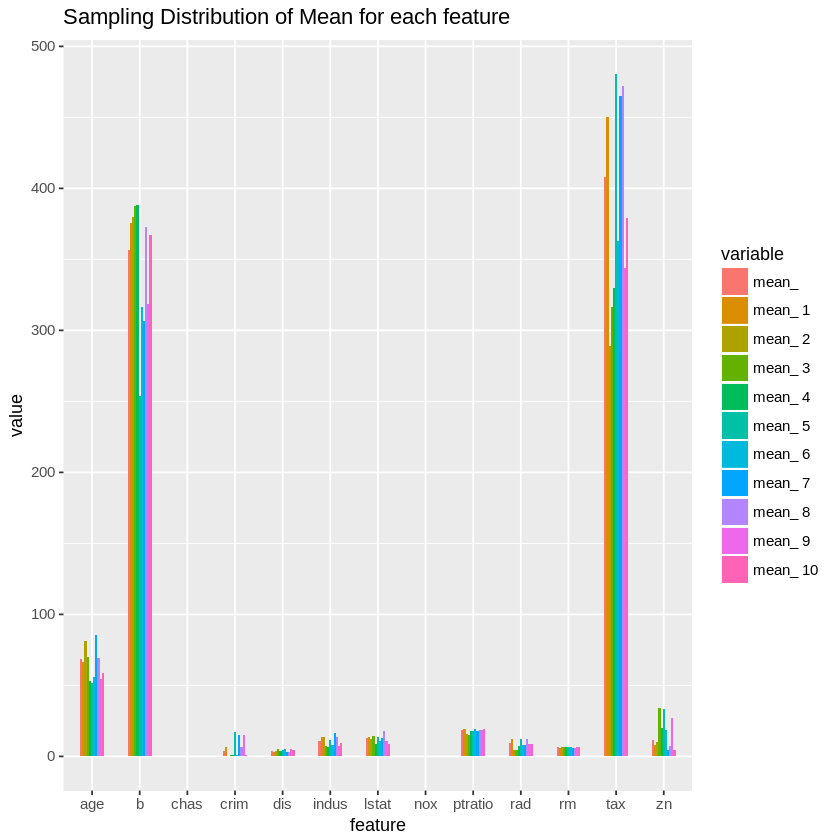

In [11]:
library(reshape2)
library(ggplot2)

#ggplot(melt(summary_vals), aes(x = feature, y = value, fill = variable)) +  of Mean for each feature
 #   geom_bar(stat = "identity", width=0.5, position = "dodge")

ggplot(melt(summary_vals), aes(fill=variable, y=value, x=feature)) +
    geom_bar(stat="identity", width=0.5, position="dodge") +
     ggtitle("Sampling Distribution of Mean for each feature")
        


For most of the features e.g., age, b, tax, zn there seems to be a big variation in the mean between the samples
as compared to the mean of the population.

Lets increase the sample size n and see what happens.

### Test 2: Sample Size n = 20 and Repeat  r = 10

In [12]:
n = 20
r = 10

In [13]:
#summary_vals = data.frame(feature=colnames(bostonhousing_features))
#summary_vals['mean_'] = sapply(bostonhousing_features, mean)
#summary_vals

In [14]:
library(dplyr, warn.conflicts = FALSE)
samples = list()
for (i in 1:r) {
    samples[[i]] = sample_n(bostonhousing_features, size = n, replace = FALSE)
}

In [15]:
for (i in 1:r) {
    summary_vals[paste('mean_', i)] = sapply(samples[[i]], mean)
}

In [16]:
summary_vals

feature,mean_,mean_ 1,mean_ 2,mean_ 3,mean_ 4,mean_ 5,mean_ 6,mean_ 7,mean_ 8,mean_ 9,mean_ 10
crim,3.61352356,1.734361,3.267678,5.370679,2.622853,6.313908,3.682934,7.344544,2.278011,2.803842,2.976906
zn,11.36363636,7.750000,4.625000,5.750000,13.375000,9.075000,9.225000,8.350000,8.500000,10.700000,18.525000
indus,11.13677866,11.041000,12.200500,9.024000,9.947000,11.552000,9.706000,12.459000,9.476500,13.088000,9.529000
chas,0.06916996,0.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.100000,0.000000
nox,0.55469506,0.527150,0.550450,0.522600,0.574745,0.601100,0.537755,0.574045,0.522350,0.582000,0.534335
rm,6.28463439,6.483000,6.287500,6.550400,6.443500,6.146300,6.349200,6.333250,6.174750,6.138250,6.124800
age,68.57490119,57.960000,70.900000,64.535000,76.905000,71.885000,63.750000,73.135000,65.570000,71.955000,57.175000
dis,3.79504269,3.683525,3.481830,3.792060,3.415800,3.798985,3.778850,3.656305,3.710830,3.160945,4.653715
rad,9.54940711,5.900000,11.300000,8.250000,10.300000,11.100000,10.100000,12.550000,6.200000,10.450000,8.050000
tax,408.23715415,325.050000,438.400000,361.700000,415.050000,423.650000,392.350000,446.100000,333.150000,441.800000,372.200000


#### Lets plot the mean of the samples and the population so we can visualize it.

Using feature as id variables


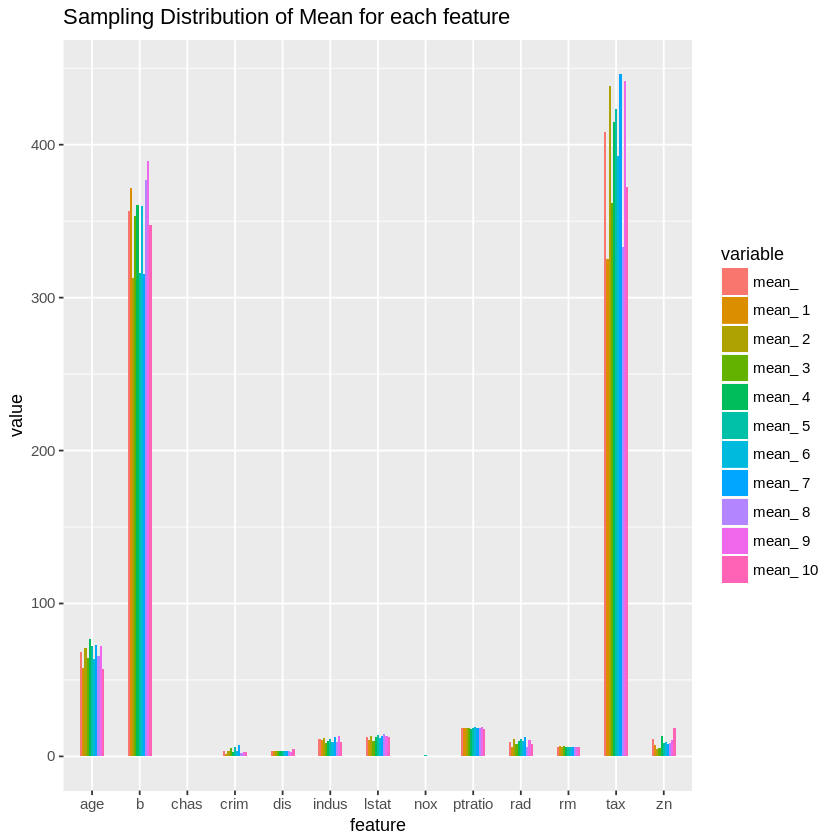

In [17]:
library(reshape2)
library(ggplot2)

#ggplot(melt(summary_vals), aes(x = feature, y = value, fill = variable)) +  of Mean for each feature
 #   geom_bar(stat = "identity", width=0.5, position = "dodge")

ggplot(melt(summary_vals), aes(fill=variable, y=value, x=feature)) +
    geom_bar(stat="identity", width=0.5, position="dodge") +
     ggtitle("Sampling Distribution of Mean for each feature")

Notice that for each feature, the mean of the samples are converging towards the mean of the population.

Let's increate the smaple size further and see if we can have a smoother curve between the means.

### Test 3: Sample Size n = 50 and Repeat  r = 10

In [18]:
n = 50
r = 10

In [19]:
#summary_vals = data.frame(feature=colnames(bostonhousing_features))
#summary_vals['mean_'] = sapply(bostonhousing_features, mean)
#summary_vals

In [20]:
samples = list()
for (i in 1:10) {
    samples[[i]] = sample_n(bostonhousing_features, size = n, replace = FALSE)
}

In [21]:
for (i in 1:10) {
    summary_vals[paste('mean_', i)] = sapply(samples[[i]], mean)
}

In [22]:
summary_vals

feature,mean_,mean_ 1,mean_ 2,mean_ 3,mean_ 4,mean_ 5,mean_ 6,mean_ 7,mean_ 8,mean_ 9,mean_ 10
crim,3.61352356,4.468762,2.994754,1.627330,2.423299,4.223834,3.297042,3.229264,2.304655,2.944006,3.918079
zn,11.36363636,7.190000,5.730000,13.200000,6.200000,15.060000,12.100000,8.010000,9.100000,14.060000,12.760000
indus,11.13677866,12.075000,12.521600,9.589800,11.188200,11.871400,11.684400,11.551000,11.838800,11.054800,10.455600
chas,0.06916996,0.060000,0.080000,0.060000,0.040000,0.080000,0.080000,0.080000,0.080000,0.020000,0.080000
nox,0.55469506,0.564280,0.561138,0.537494,0.558840,0.562222,0.566918,0.563360,0.552100,0.561202,0.548538
rm,6.28463439,6.266600,6.210880,6.312580,6.156520,6.308160,6.217580,6.205300,6.247440,6.308320,6.340240
age,68.57490119,69.314000,69.066000,63.294000,73.952000,74.254000,66.892000,75.016000,69.124000,71.280000,69.006000
dis,3.79504269,3.467916,3.658320,3.978572,3.650030,3.691142,3.799380,3.264412,3.724342,3.845958,3.884622
rad,9.54940711,11.080000,9.980000,7.960000,8.800000,8.540000,9.200000,11.160000,8.740000,9.140000,10.100000
tax,408.23715415,447.300000,427.620000,390.300000,395.100000,404.840000,408.520000,417.960000,409.000000,403.520000,407.980000


#### Lets plot the mean of the samples and the population so we can visualize it.

Using feature as id variables


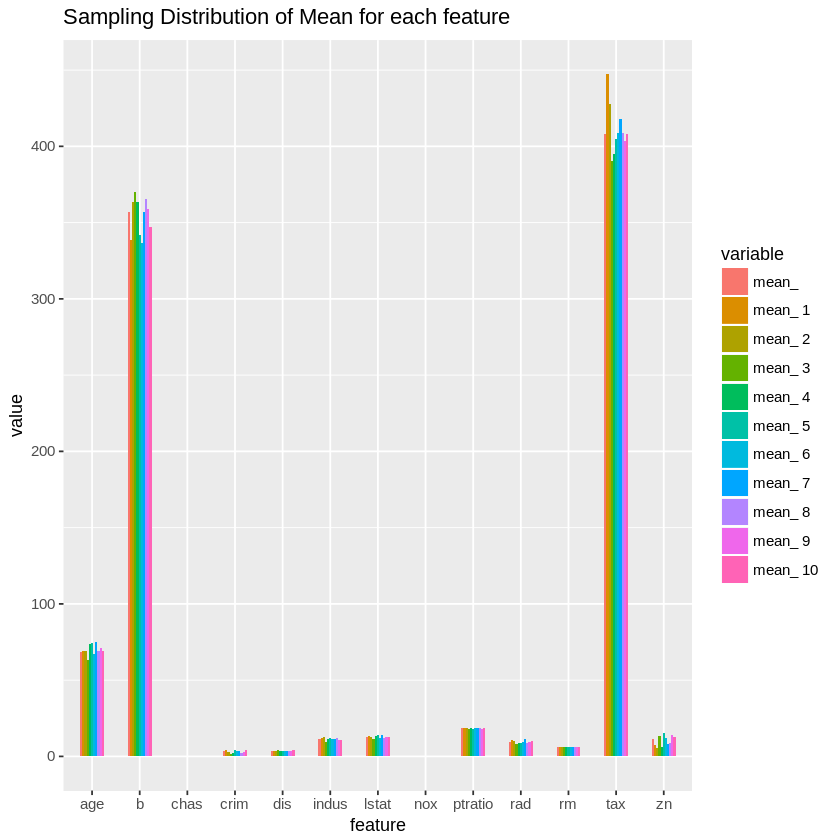

In [23]:
ggplot(melt(summary_vals), aes(fill=variable, y=value, x=feature)) +
    geom_bar(stat="identity", width=0.5, position="dodge") +
     ggtitle("Sampling Distribution of Mean for each feature")

#### At, Sample size n = 50, the distribution for each of the features seem to be pretty close to the population. So seems like our ideal sample size is 50, which is at approximately 10% of the complete dataset.